Authored by:


Name: Ashvinth Sanmuganathan 
SID: 12809265

File Branch: https://github.com/Ash-95/UTS_ML2019_ID12809265/blob/master/A2_12809265.ipynb

Master Branch: https://github.com/Ash-95/UTS_ML2019_ID12809265

Name: Mofei Shi
SID: 13284676

GitHub Link: https://github.com/MofeiShi/ML/tree/ML_assignment2





# Introduction (200)


> Define the Problem (200):

Students who are about to graduate are eager to know the details of their careers. One of the method career advisors at the campus may advise the graduating students to do is study the recruitment advertisements.   Such advertisements contain useful information, such as skills requirement, company locations, and salary. However, it is difficult to discover trends and patterns without first integrate all the job advertisements into a dataset. We found the Dataset that integrated job advertisements on Data Analytics on Indeed, a job-seeking website. The dataset is posted on Kaggle.com by the user Elroy. (https://www.kaggle.com/elroyggj/indeed-dataset-data-scientistanalystengineer). 

**The current Practical Project attempts to analyse the Indeed dataset and shed some light on the career of Data Analytic.**

Specifically, we want to answer the following questions:

1.   Which programming skills are the most popular?
2.   Which state has the most opportunity?
3.   Which industry demand Data Analytics?
4.   Would more skills one have, gain oneslef better salary?
5.   Which type of Data Analyical jobs has the highest pay.


**And lastly, we want to build a machine learning model to predict salary.**











# Exploration (300)

> Identify Challenges


*   we need to convert  some categorical attributes to numerical values
*   we need to identify which attributes are most likely to be influential in predicting salary 
*   we need to make a neural network and use it to predict salary



##Setup and importing librarys

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})

##Data Exploration and Data Preprocessing

In [0]:
df0 = pd.read_csv('/content/gdrive/My Drive/Machine Learning/Assessment 2/indeed-dataset-data-scientistanalystengineer/indeed_job_dataset.csv')
df0.head(5)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,15.0,"[<p><b>What do we need?</b></p>, <ul><li>\r\r\...",TX,NaN,NaN,NaN,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,1.0,"[<ul><li>Validate, analyze, and conduct statis...",OR,NaN,NaN,NaN,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,30.0,"[<p>Full time</p>, <p>Washington, DC metro are...",DC,NaN,NaN,Government,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,30.0,[<ul><li>Assist in consultations with business...,TX,NaN,"Less than 10,000",Banks and Financial Services,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


## The Limitations of the dataset

We can identify a few limitations of the dataset from reading the Dataset Description written by the original author:


1.   The author did not specify what the processes of acquiring the database are.
2.   The author mentioned that there were missing Queried_Salary values, and the author replace missing values with his estimation. But we do not know how he estimated the Queried_Salary values, and we don't know which values are estimation. 
3.   Job Advertisement tend to target at job seeker that have some experience, hence our analysis may not be optimal in helping users who has no experience at all. 
4.   The dataset was compiled using the data from the U.S. Hence there may be gaps for Australian users.
5.   The Queried_Salary attribute values are in ranges, hence it is inherently inaccurate. 




###Find out what are the skills required in general

In [0]:
dfTest = df0['Skill']
print(dfTest.head(5))
dfTest = pd.DataFrame(dfTest)
dfTest.head(5)

0                                       ['SAP', 'SQL']
1    ['Machine Learning', 'R', 'SAS', 'SQL', 'Python']
2    ['Data Mining', 'Data Management', 'R', 'SAS',...
3                       ['Certified Internal Auditor']
4    ['Statistical Software', 'Time Management', 'R...
Name: Skill, dtype: object


,Skill
0,"['SAP', 'SQL']"
1,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']"
2,"['Data Mining', 'Data Management', 'R', 'SAS',..."
3,['Certified Internal Auditor']
4,"['Statistical Software', 'Time Management', 'R..."


In [0]:
dfSkills = pd.DataFrame(columns =['Skills_Extracted'] )
dfSkills

,Skills_Extracted


In [0]:
dfTest["Skill"].fillna("No Skills", inplace = True) 
#print(dfTest)

In [0]:
for j in range(len(dfTest)):
  sent = dfTest['Skill'][j]
  newWord = True
  #print(sent)
  for i in range(len(sent)):
    if sent[i] == "'" and newWord == True:
      wordB = i
      newWord = False
    elif sent[i] == "'" and newWord == False:
      wordE = i+1
      newWord = True
      word = sent[wordB:wordE]
      #print(word)  
      dfSkills = dfSkills.append({'Skills_Extracted' : word},
                           ignore_index=True)

In [0]:
print(dfSkills.head(5))

     Skills_Extracted
0               'SAP'
1               'SQL'
2  'Machine Learning'
3                 'R'
4               'SAS'


In [0]:
dfn = dfSkills.groupby('Skills_Extracted')['Skills_Extracted'].count()
dfn = dfn.sort_values(ascending=False)
print(dfn.head(20))
print(type(dfn))
print(len(dfn))
print(len(df0))

Skills_Extracted
'Python'                         3325
'SQL'                            3104
'Machine Learning'               2297
'R'                              2234
'Hadoop'                         1714
'Spark'                          1531
'Java'                           1480
'Tableau'                        1236
'Data Mining'                    1059
'Hive'                            966
'SAS'                             941
'Big Data'                        916
'AWS'                             883
'Scala'                           837
'NoSQL'                           607
'C/C++'                           577
'Natural Language Processing'     570
'Oracle'                          526
'Data Warehouse'                  520
'Linux'                           490
Name: Skills_Extracted, dtype: int64
<class 'pandas.core.series.Series'>
464
5715


#### Findings
We formed the list of occurrences of keywords under the attribute “Skills” in a descending order. Out of 5715 entries, 464 unique keywords were identified. Most of the top keywords are programming skills, with a few general theoretical knowledge, such as ‘Big Data’ mixed in. No soft skills were listed on the top 20. 

### Drop some columns that are difficult to use. 

In [0]:
df1 = df0.drop(['Unnamed: 0','Job_Title','Link','Date_Since_Posted','Description'], axis = 1)
print(df1.head(5))
#print(df1.columns)

  Queried_Salary        Job_Type  ... Insurance  Other_industries
0         <80000  data_scientist  ...         0                 0
1         <80000  data_scientist  ...         0                 0
2         <80000  data_scientist  ...         0                 0
3         <80000  data_scientist  ...         0                 1
4         <80000  data_scientist  ...         0                 0

[5 rows x 38 columns]


In [0]:
df2 = df1
print(df2.head(5))

  Queried_Salary        Job_Type  ... Insurance  Other_industries
0         <80000  data_scientist  ...         0                 0
1         <80000  data_scientist  ...         0                 0
2         <80000  data_scientist  ...         0                 0
3         <80000  data_scientist  ...         0                 1
4         <80000  data_scientist  ...         0                 0

[5 rows x 38 columns]


###Explore the popularity of the top 8 programming skills

In [0]:
for i in range(len(df2.columns)):
  print(str(i)+' ' +df2.columns[i])

0 Queried_Salary
1 Job_Type
2 Skill
3 No_of_Skills
4 Company
5 No_of_Reviews
6 No_of_Stars
7 Location
8 Company_Revenue
9 Company_Employees
10 Company_Industry
11 python
12 sql
13 machine learning
14 r
15 hadoop
16 tableau
17 sas
18 spark
19 java
20 Others
21 CA
22 NY
23 VA
24 TX
25 MA
26 IL
27 WA
28 MD
29 DC
30 NC
31 Other_states
32 Consulting and Business Services
33 Internet and Software
34 Banks and Financial Services
35 Health Care
36 Insurance
37 Other_industries


In [0]:
strLst = []
for i in range(11,21):
  strLst.append(df2.columns[i])
    
print(strLst)

#precentage calculating dataframe:dfPC
dfPC= df2[strLst]
print(dfPC.head(10))

rowTotal = len(dfPC)

#popularity dataframe: dfPop
dfPop = pd.DataFrame(columns =['Variables','Pop%'] )

for i in strLst:
  precentage = 100*((len(dfPC.loc[dfPC[i]==1]))/rowTotal)

  dfPop = dfPop.append({'Variables' : i,
                        'Pop%' :int(precentage)},
                       ignore_index=True)



dfPop.sort_values(by = 'Pop%', ascending=False)

['python', 'sql', 'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'Others']
   python  sql  machine learning  r  hadoop  tableau  sas  spark  java  Others
0       0    1                 0  0       0        0    0      0     0       1
1       1    1                 1  1       0        0    1      0     0       0
2       1    1                 0  1       0        0    1      0     0       1
3       0    0                 0  0       0        0    0      0     0       1
4       0    0                 0  1       0        1    0      0     0       1
5       0    0                 1  0       0        0    0      0     0       1
6       1    1                 1  1       0        0    0      0     0       1
7       0    1                 1  1       0        0    0      0     0       0
8       1    0                 0  1       0        0    0      0     0       1
9       1    0                 0  1       0        0    0      0     0       1


,Variables,Pop%
9,Others,90
0,python,58
1,sql,54
2,machine learning,40
3,r,39
4,hadoop,29
7,spark,26
8,java,25
5,tableau,21
6,sas,16


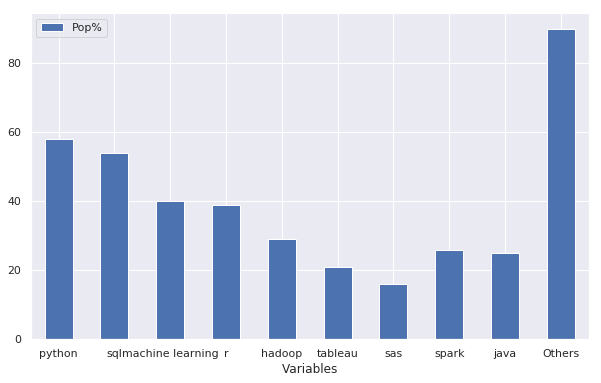

In [0]:
ax = dfPop.plot.bar(x='Variables', y = 'Pop%', rot = 0)

#### Findings

We calculated the frequencies of the top 8 programming languages and found: 


1.   Python and SQL are the most in demand programming languages in the job advertisements.
2.   The employers ask for skills that are  outside the top 8 programming skills roughly 90% of the time.  



###Explore the popularity of the top 10 hiring states (US)

In [0]:
strLst = []
for i in range(21,32):
  strLst.append(df2.columns[i])
    
print(strLst)

#precentage calculating dataframe:dfPC
dfPC= df2[strLst]
print(dfPC.head(10))

rowTotal = len(dfPC)
print(rowTotal)

#popularity dataframe: dfPop
dfPop = pd.DataFrame(columns =['Variables','Pop%'] )

for i in strLst:
  precentage = 100*((len(dfPC.loc[dfPC[i]==1]))/rowTotal)

  dfPop = dfPop.append({'Variables' : i,
                        'Pop%' :int(precentage)},
                       ignore_index=True)



dfPop

['CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC', 'NC', 'Other_states']
   CA  NY  VA  TX  MA  IL  WA  MD  DC  NC  Other_states
0   0   0   0   0   0   0   0   0   0   0             1
1   0   0   0   1   0   0   0   0   0   0             0
2   0   0   0   0   0   0   0   0   0   0             1
3   0   0   0   0   0   0   0   0   1   0             0
4   0   0   0   1   0   0   0   0   0   0             0
5   0   0   0   0   0   0   0   1   0   0             0
6   0   1   0   0   0   0   0   0   0   0             0
7   0   0   0   0   0   0   0   0   0   0             1
8   0   0   0   0   0   0   0   0   0   0             1
9   0   0   0   0   0   0   0   0   0   0             1
5715


,Variables,Pop%
0,CA,24
1,NY,10
2,VA,5
3,TX,5
4,MA,4
5,IL,4
6,WA,3
7,MD,2
8,DC,2
9,NC,2


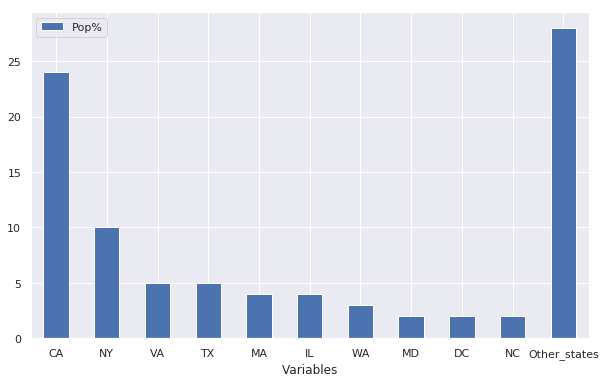

In [0]:
ax = dfPop.plot.bar(x='Variables', y = 'Pop%', rot = 0)

#### Findings
We found that CA has significant more demand for Data Analytical employee than the other states. There were a lot missing values in the dataset, but we assumes the data distribution in the dataset is representative. 

###Explore the popularity of the top 5 hiring industrys

In [0]:
strLst = []
for i in range(32, 38):
  strLst.append(df2.columns[i])
    
print(strLst)

#precentage calculating dataframe:dfPC
dfPC= df2[strLst]
print(dfPC.head(10))

rowTotal = len(dfPC)
print(rowTotal)

#popularity dataframe: dfPop
dfPop = pd.DataFrame(columns =['Variables','Pop%'] )

for i in strLst:
  precentage = 100*((len(dfPC.loc[dfPC[i]==1]))/rowTotal)

  dfPop = dfPop.append({'Variables' : i,
                        'Pop%' :int(precentage)},
                       ignore_index=True)



dfPop

['Consulting and Business Services', 'Internet and Software', 'Banks and Financial Services', 'Health Care', 'Insurance', 'Other_industries']
   Consulting and Business Services  ...  Other_industries
0                                 0  ...                 0
1                                 0  ...                 0
2                                 0  ...                 0
3                                 0  ...                 1
4                                 0  ...                 0
5                                 0  ...                 0
6                                 0  ...                 1
7                                 0  ...                 0
8                                 0  ...                 1
9                                 0  ...                 1

[10 rows x 6 columns]
5715


,Variables,Pop%
0,Consulting and Business Services,12
1,Internet and Software,11
2,Banks and Financial Services,8
3,Health Care,5
4,Insurance,3
5,Other_industries,24


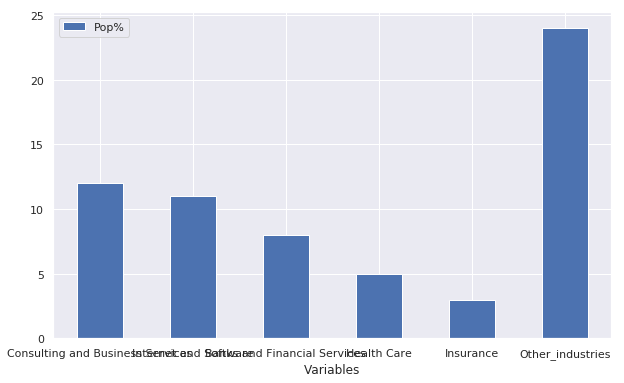

In [0]:
ax = dfPop.plot.bar(x='Variables', y = 'Pop%', rot = 0)

###Explore the relationship between Queried_Salary and No_of_Skills

In [0]:
salDict = {'<80000':0,
           '80000-99999':1,
           '100000-119999':2,
           '120000-139999':3,
           '140000-159999':4,
            '>160000':5}
print(salDict)

#salDict = dict((y,x) for x,y in salDict.items())
ks = salDict.keys()
va = salDict.values()
newCol = df2['Queried_Salary'].replace(ks,va)
print('The new column: \n{}'.format(newCol.head(5)))
print(type(newCol))

{'<80000': 0, '80000-99999': 1, '100000-119999': 2, '120000-139999': 3, '140000-159999': 4, '>160000': 5}
The new column: 
0    0
1    0
2    0
3    0
4    0
Name: Queried_Salary, dtype: int64
<class 'pandas.core.series.Series'>


In [0]:
newCol = pd.DataFrame(newCol)
print(newCol.head(5))
colName =list(newCol.columns.values)[-1]
colX = newCol.rename(columns = {colName:(colName+'X')})
print(colX.head(5))
df2 = df2.join(colX)
print(df2.head(5))

   Queried_Salary
0               0
1               0
2               0
3               0
4               0
   Queried_SalaryX
0                0
1                0
2                0
3                0
4                0
  Queried_Salary        Job_Type  ... Other_industries  Queried_SalaryX
0         <80000  data_scientist  ...                0                0
1         <80000  data_scientist  ...                0                0
2         <80000  data_scientist  ...                0                0
3         <80000  data_scientist  ...                1                0
4         <80000  data_scientist  ...                0                0

[5 rows x 39 columns]


In [0]:
dfn = df2.groupby('Queried_SalaryX')['Queried_SalaryX'].count()
print(dfn)
print(type(dfn))

Queried_SalaryX
0     788
1     953
2    1394
3    1292
4     873
5     415
Name: Queried_SalaryX, dtype: int64
<class 'pandas.core.series.Series'>


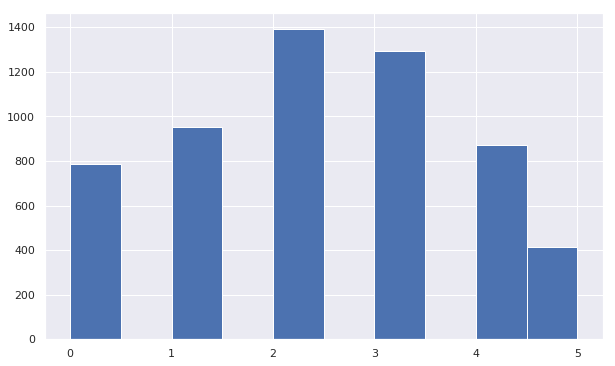

In [0]:
df2['Queried_SalaryX'].hist()

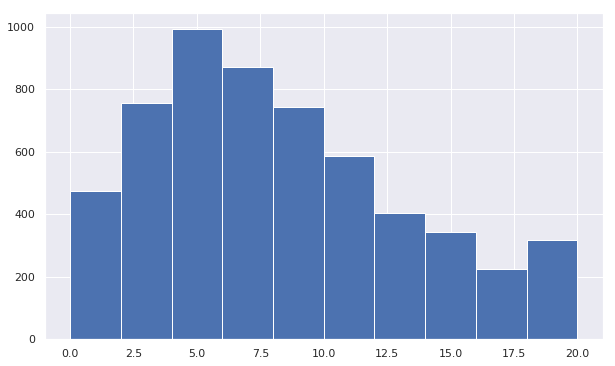

In [0]:
df2['No_of_Skills'].hist()

In [0]:
dfPlot = df2.groupby(['Queried_SalaryX', 'No_of_Skills'])
print(dfPlot.size())
dfPlot = pd.DataFrame(dfPlot.size())


Queried_SalaryX  No_of_Skills
0                0               101
                 1                94
                 2                94
                 3               127
                 4                89
                 5                86
                 6                76
                 7                34
                 8                27
                 9                16
                 10               13
                 11               15
                 12                5
                 13                2
                 14                2
                 16                4
                 17                1
                 18                1
                 19                1
1                0                59
                 1                58
                 2                84
                 3                91
                 4               102
                 5               117
                 6                91
        

In [0]:
dfPlot=dfPlot.reset_index().rename(columns = {0:'Frequency'})
dfPlot.head(10)

,Queried_SalaryX,No_of_Skills,Frequency
0,0,0,101
1,0,1,94
2,0,2,94
3,0,3,127
4,0,4,89
5,0,5,86
6,0,6,76
7,0,7,34
8,0,8,27
9,0,9,16


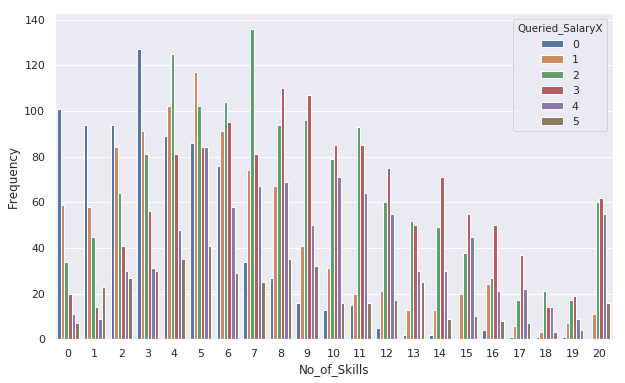

In [0]:

sns.barplot(x=dfPlot.No_of_Skills, y= dfPlot.Frequency, hue = dfPlot.Queried_SalaryX )
plt.show()

In [0]:
corr = dfPlot.corr()
corr.style.background_gradient(cmap='coolwarm')


,Queried_SalaryX,No_of_Skills,Frequency
Queried_SalaryX,1,0.0301795,-0.185282
No_of_Skills,0.0301795,1,-0.462934
Frequency,-0.185282,-0.462934,1


#### Findings
We found the No_of_Skills does not have a significant influence to Queried_Salary. 

###Explore the relationship between Queried_SalaryX and Job_Type

In [0]:
dfPlot = df2.groupby(['Queried_SalaryX', 'Job_Type'])
print(dfPlot.size())
dfPlot = pd.DataFrame(dfPlot.size())


Queried_SalaryX  Job_Type      
0                data_analyst      713
                 data_engineer      27
                 data_scientist     48
1                data_analyst      595
                 data_engineer     125
                 data_scientist    233
2                data_analyst      288
                 data_engineer     396
                 data_scientist    710
3                data_analyst       70
                 data_engineer     452
                 data_scientist    770
4                data_analyst       47
                 data_engineer     275
                 data_scientist    551
5                data_analyst       80
                 data_engineer     104
                 data_scientist    231
dtype: int64


In [0]:
dfPlot=dfPlot.reset_index().rename(columns = {0:'Frequency'})
dfPlot.head(10)

,Queried_SalaryX,Job_Type,Frequency
0,0,data_analyst,713
1,0,data_engineer,27
2,0,data_scientist,48
3,1,data_analyst,595
4,1,data_engineer,125
5,1,data_scientist,233
6,2,data_analyst,288
7,2,data_engineer,396
8,2,data_scientist,710
9,3,data_analyst,70


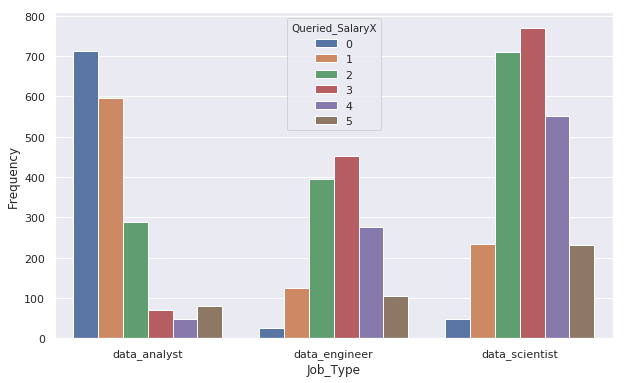

In [0]:

sns.barplot(x=dfPlot.Job_Type, y= dfPlot.Frequency, hue = dfPlot.Queried_SalaryX )
plt.show()

#### Findings
We found that the different type of Data Analytical jobs have significant different pay. The highest pay goes to data_scientist, then data_engineer, and lastly, data_analyst.

###Explore the relationship between Queried_SalaryX and python 

In [0]:
dfPlot = df2.groupby(['Queried_SalaryX', 'python'])
print(dfPlot.size())
dfPlot = pd.DataFrame(dfPlot.size())


Queried_SalaryX  python
0                0         644
                 1         144
1                0         541
                 1         412
2                0         533
                 1         861
3                0         335
                 1         957
4                0         199
                 1         674
5                0         138
                 1         277
dtype: int64


In [0]:
dfPlot=dfPlot.reset_index().rename(columns = {0:'Frequency'})
dfPlot.head(10)

,Queried_SalaryX,python,Frequency
0,0,0,644
1,0,1,144
2,1,0,541
3,1,1,412
4,2,0,533
5,2,1,861
6,3,0,335
7,3,1,957
8,4,0,199
9,4,1,674


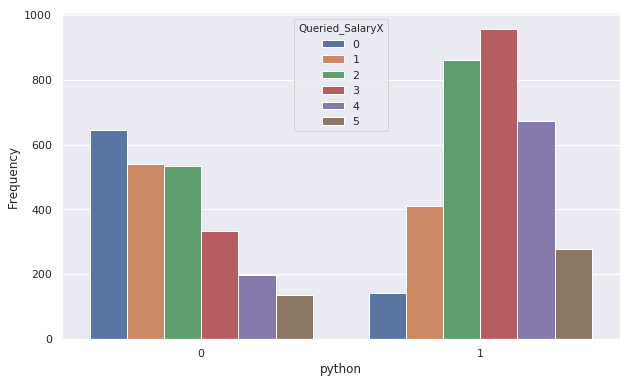

In [0]:

sns.barplot(x=dfPlot.python, y= dfPlot.Frequency, hue = dfPlot.Queried_SalaryX )
plt.show()

### Preprocessing for Machine Learning - Numericalization for Categorical data

In [0]:
len(df2['Company'].unique())
companyNames = df2['Company'].unique()
companyDict = {}
for i in range(len(companyNames)):
  companyDict[i]  =companyNames[i]

  
companyDict = dict((y,x) for x,y in companyDict.items())
ks = companyDict.keys()
va = companyDict.values()
newCol = df2['Company'].replace(ks,va)


In [0]:
len(df2['CompanyX'].unique())

2232

In [0]:
newCol = pd.DataFrame(newCol)
print(newCol.head(5))
colName =list(newCol.columns.values)[-1]
colX = newCol.rename(columns = {colName:(colName+'X')})
print(colX.head(5))
df2 = df2.join(colX)
print(df2.head(5))

   Company
0        0
1        1
2        2
3        3
4        4
   CompanyX
0         0
1         1
2         2
3         3
4         4
  Queried_Salary        Job_Type  ... Queried_SalaryX  CompanyX
0         <80000  data_scientist  ...               0         0
1         <80000  data_scientist  ...               0         1
2         <80000  data_scientist  ...               0         2
3         <80000  data_scientist  ...               0         3
4         <80000  data_scientist  ...               0         4

[5 rows x 40 columns]


In [0]:
len(df2['Job_Type'].unique())
jobNames = df2['Job_Type'].unique()
jobDict = {}
for i in range(len(jobNames)):
  jobDict[i]  =jobNames[i]

  
jobDict = dict((y,x) for x,y in jobDict.items())
ks = jobDict.keys()
va = jobDict.values()
newCol = df2['Job_Type'].replace(ks,va)


In [0]:
newCol = pd.DataFrame(newCol)
print(newCol.head(5))
colName =list(newCol.columns.values)[-1]
colX = newCol.rename(columns = {colName:(colName+'X')})
print(colX.head(5))
df2 = df2.join(colX)
print(df2.head(5))

   Job_Type
0         0
1         0
2         0
3         0
4         0
   Job_TypeX
0          0
1          0
2          0
3          0
4          0
  Queried_Salary        Job_Type  ... CompanyX  Job_TypeX
0         <80000  data_scientist  ...        0          0
1         <80000  data_scientist  ...        1          0
2         <80000  data_scientist  ...        2          0
3         <80000  data_scientist  ...        3          0
4         <80000  data_scientist  ...        4          0

[5 rows x 41 columns]


# Methodology (300/100)

## Implement Algorithms

###Build and Train Data Models

Split Data

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df2[['Job_TypeX','python',	'sql', 'machine learning',	'r',	'hadoop',	'tableau',
                                                         'sas',	'spark',	'java','CA','NY','VA','TX','MA','IL','WA','MD','DC','NC',
                                                        'Consulting and Business Services',	'Internet and Software',	
                                                         'Banks and Financial Services', 'Health Care',	'Insurance']], 
                                                    df2['Queried_SalaryX'], test_size = 0.3, random_state=1)


In [0]:
x_train.head(5)

,Job_TypeX,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance
1921,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3665,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3132,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3329,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5035,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Data conversion for Random Forest

In [0]:

x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

Data Conversion for Neural Network

In [0]:
import torch
import torch.nn as nn

In [0]:
from torch.autograd import Variable
feature_train_v = Variable(torch.FloatTensor(x_train), requires_grad = False)
labels_train_v = Variable(torch.LongTensor(y_train), requires_grad = False)
feature_test_v = Variable(torch.FloatTensor(x_test), requires_grad = False)
labels_test_v = Variable(torch.LongTensor(y_test), requires_grad = False)

**BUILD, TRAIN AND TEST NEURAL NETWORK**

In [0]:
class ashNet(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        
        super (ashNet, self).__init__()
        
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.num_classes = num_classes
        
        self.layer1 = nn.Linear(self.input_size, self.hidden1_size)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(self.hidden1_size, self.hidden2_size)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(self.hidden2_size, self.num_classes)
        self.softmax = nn.LogSoftmax(dim = 1)
    
    def forward(self, x_input):
    
        #print(self.input_size)
        #print(self.hidden1_size)
        #print(x_input.shape)
        #print(self.layer1)
        #sys.exit()
        output = self.layer1(x_input)
        output = self.relu1(output)
        output = self.layer2(output)
        output = self.relu2(output)
        output = self.layer3(output)
        output = self.softmax(output)
        
        return output

In [0]:
a=feature_train_v.shape[1]#NUmber of Features
b=len(feature_train_v)#Number of training entries
c=len(feature_train_v)
d=len(df2['Queried_SalaryX'].unique())#Number of classes to classify

model2 = ashNet(a, b, c, d)
print(model2)

ashNet(
  (layer1): Linear(in_features=25, out_features=4000, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=4000, out_features=4000, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=4000, out_features=6, bias=True)
  (softmax): LogSoftmax()
)


In [0]:
loss_func = nn.CrossEntropyLoss()
optimise = torch.optim.Adam(model2.parameters(), lr = 0.01)

In [0]:
for epoch in range(200):
    running_loss = 0
    optimise.zero_grad()
    out = model2(feature_train_v)
    loss = loss_func(out, labels_train_v)
    loss.backward()
    optimise.step()
    running_loss += loss.item()
    
    if epoch % 10 == 0:
        print(f"Training loss: {running_loss/len(labels_train_v)}")
print('Training Finished')        

Training loss: 0.0004464296996593475
Training loss: 0.0003975595235824585
Training loss: 0.0003414255082607269
Training loss: 0.0003005565404891968
Training loss: 0.0002502784430980682
Training loss: 0.00019573605060577392
Training loss: 0.00015481014549732208
Training loss: 0.000135873943567276
Training loss: 0.00012888555228710174
Training loss: 0.00012488074600696563
Training loss: 0.000122762031853199
Training loss: 0.0001224234774708748
Training loss: 0.00012304213643074037
Training loss: 0.00012333538383245467
Training loss: 0.00012200941890478134
Training loss: 0.00012152837216854096
Training loss: 0.00012111644446849823
Training loss: 0.00012113033980131149
Training loss: 0.00012155186384916306
Training loss: 0.00012127199769020081
Training Finished


In [0]:
outputs = model2(feature_test_v)
_, predicted = torch.max(outputs, 1)
accuracy  = [i for i, j in zip(predicted, labels_test_v) if i==j]
print('Accuracy of prediction is {} %'.format((len(accuracy)/len(labels_test_v))*100))
#/len(labels_test_v)


Accuracy of prediction is 40.816326530612244 %


In [0]:
import xgboost

In [0]:
model = xgboost.XGBClassifier(colsample_bytree=0.5,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=15,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [0]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.07, max_delta_step=0, max_depth=15,
              min_child_weight=1.5, missing=None, n_estimators=10000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
              silent=None, subsample=0.6, verbosity=1)

In [0]:
preds1 = model.predict(x_test)
preds1

array([2, 2, 3, ..., 5, 0, 2])

In [0]:
acc1 = [i for i,j in zip(preds1, y_test) if i==j]

print(len(acc1)/len(y_test))

0.4239067055393586


**BUILD, TRAIN AND TEST RANDOM FOREST**

In [0]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=1000, max_depth=15,
                             random_state=1)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)

acc = [i for i,j in zip(preds, y_test) if i==j]
print(len(acc)/len(y_test))

0.4466472303206997


To give the best predictive analytics for the dataset, we decided to choose features that would provide the model with a distribution that would allow the model to separate six different salary ranges. For the data to be deciphered by the neural network that salary categories were converted from words representing categorical ordinal data to numbers that represented each class.
Salary Range -->	Encoded Descriptor
1.   <80000 -->0
2.   80000-99999 -->1
3.   100000-119999 -->2
4.   120000-139999 -->3
5.   140000-159999 -->4
6.   bigger than 160000 -->5

The skills, states and job industries were all one hot encoded onto the table from the skills table to make classification based on these individual attributes easier. The skills features, the state features, the industry features and finally the job type encoded as JobX were then chosen to be a part of the classification. These tables were randomly separated into training and test data with a 70:30 train: test split. Now the data was converted from a dataframe into a matrix of the values of each column. The data was ready to be processed based on the classifier.

**Random Forest**

Using a random forest classifier, 1000 trees were used with a tree depth of 15 to produce acceptable results.

**Neural Network**

Before a neural network was built the matrix of training and testing values were all converted to tensors. A neural network was then built using two linear layers with a ReLU activation function. The final linear layer was built using a Softmax function as this was a good activation function for multiclass classification. The data frame size dimensions and the intended classes were input as features into the classifier. The loss function chosen was categorical cross entropy as it is an accurate multiclass loss function. The last parameter used was an Adam optimiser which can adjust learning rate based on the derivative of loss. After these 200 epochs were used for training the classifier. This involved setting gradients to zero for each new epoch. The training data was then run through the model on forward pass to generate output probabilities. The were then compared to the training probabilities through the loss function. Then backward propagation is initiated to generate values of the derivative with the weights being incremented based on the derivatives.




# Evaluation (200)

In [0]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

Evaluate Random Forest

Text(0.5, 1.0, 'Accuracy Score: 44.66472303206997 %')

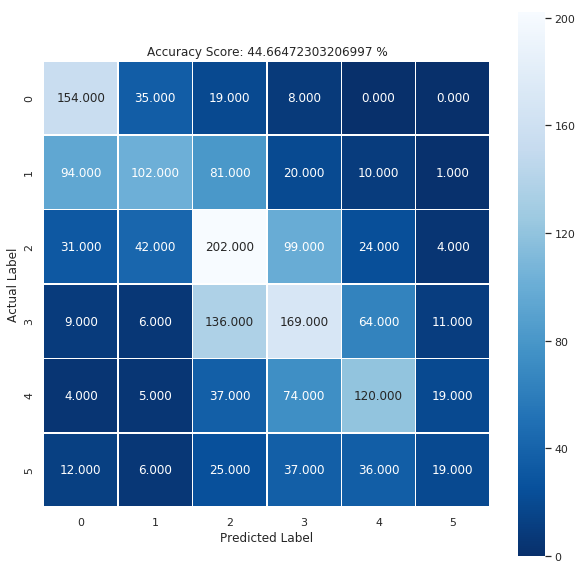

In [0]:

fig = plt.figure(figsize = (10,10))
cmRF = metrics.confusion_matrix(y_test, preds)
ax = sns.heatmap(cmRF, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
sample_title = 'Accuracy Score: {0} %'.format((len(acc)/len(y_test))*100)
plt.title(sample_title)


Evaluate Neural Network

Text(0.5, 1.0, 'Accuracy Score: 40.816326530612244 %')

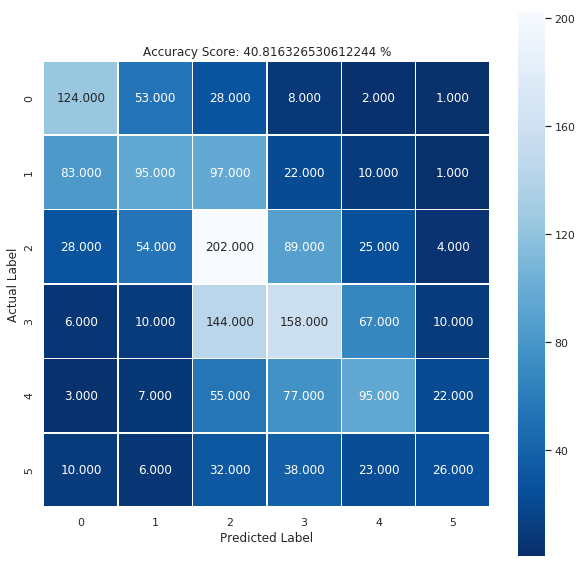

In [0]:
fig = plt.figure(figsize = (10,10))
cmNN = metrics.confusion_matrix(labels_test_v, predicted)
ax = sns.heatmap(cmNN, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
sample_title = 'Accuracy Score: {0} %'.format((len(accuracy)/len(labels_test_v))*100)
plt.title(sample_title)


Evaluation
Given the nature of the data we decided to test the accuracy of two classification algorithms. The random forest algorithm was compared to the traditional ANN (Artificial neural network) to determine which one would classify salaries better. The table below summarises the performance differences between both machine learning classifiers.

Neural Network   

1.   Time: 15-25 min (based on epochs)
2.   Accuracy: 42.4% without "CompanyX", 25.2% with "CompanyX"
3.   Time Complexity: Unknown

Random Forest

1.   Time: 5 Seconds
2.   Accuracy: 44.6% without "CompanyX", 64.3% with "CompanyX"
3.   O(4000*25*log (25))





For the indeed dataset that we trained both networks on, it was clear that the random forest outperformed the neural network by a slight margin. However including the attribute CompanyX which lists the compnay the job is actually for lowers the perfromance of the neural ntwork significantly. Howver it also increases the preformance of the random forest significantly. The reason for such a difference is that random forests can use the companies to spearate the data into homogenous sets. Neural netowrks use the different compnay to alter class weigts and because there are so many differentcompanies it has created many confounding factors. Performance of each salary range was also found to see if machine learning classifiers had performed better to classify salary ranges.

  
To note the whiter the box, the better the classifier was at predicting a class. Both machine learning classifiers were able to predict the salary range of <80000 reasonably effectively. However as noted in the figure, both classifiers began to struggle with predictions that were in higher salary ranges such as the >160000 range. However overall the random forest performed more consistently. It is important to note that a prediction that aligns witch chance would return an accuracy score of 16.7%.
This was to be expected as despite the neural network using a more complex and optimised algorithm, the random forest is known to be effective for classification using categorical data. This is because a random forest is a collection of decision trees. These attempt to locate homogenous sets of data in an attribute that are associated with the most entries of each target class, repeating this process until complete classification is possible.


# Conclusion (100)

We achieved the goal we set at the begining. We built a machine learning model that is valid. 



Future Improvements:



> Data to Gather

Whilst skills were relevant it factors such as **experience and proficiency** were not taken in to account which may have affected the ability of the classifier to make meaningful predictions on salary. In the future, we can acquarie description of **career experience** and **qualifications** as attributes. 

If possible, we also want to gather precise salary information for better prediction. 

> Machine Learning Model

Construct Machine Learning Model that's more suited to use Categorical Variables. It may possibly be more effective to use a better optiminsed version of XGBoost, which incorporates graient boosting to achieve better predictive accuracy. 



# Ethical (200)




> Positives:

The current project can help the job seeker to understand better the career they are hoping to enter. The technique and procedures developed in the current project not only can apply to the profession of Data Analytics but also any profession that has enough quantity of Job Advertisement. The opportunity for misuse with our technology is slim due to the strictly analytical nature of our work. 

> Potential Negatives:

Nevertheless, we have identified some potentially negative outcomes should the results of our project become widely known. That is, people who wish to enter the profession of Data Analytics may consult our analysis for skills to acquire. People then may decide to study the most popular programming languages, leading to the demise of the unpopular programming languages. It can mask the problems with the popular programming languages, and undermine the potential of the unpopular programming languages.

In addition, the dataset did not address soft skills, such as communication skills. If the users overly rely on the discovery of our project, they may become neglect of all the necessary soft skills that were not discussed in our project. Hence they may become disadvantaged in the work market.  

